-4.999961687611479
59


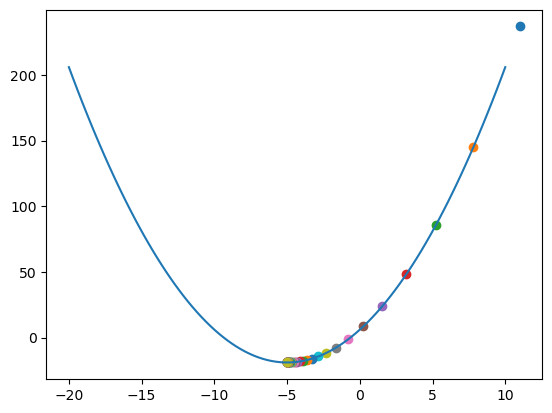

In [1]:
import numpy as np

def loss(w):
    return w**2 + 10*w +6

def d_loss(w):
    return 2*w +10

import matplotlib.pyplot as plt
x = np.linspace(-20,10,100)
y = loss(x)
plt.plot(x,y, label='loss function')

w = 15
eta = 0.1 #learning rate
error = 1e-5
step = 0 #how many steps does it take for our model
while True:
    g = d_loss(w)
    w_new = w - eta*g
    plt.scatter(w_new, loss(w_new))
    step += 1
    if abs(w_new - w) < error:
        break
    w = w_new
print(w_new)
print(step)

(100, 100) (100, 100) (100, 100)
[ 3.33333348 -0.66666674]
50


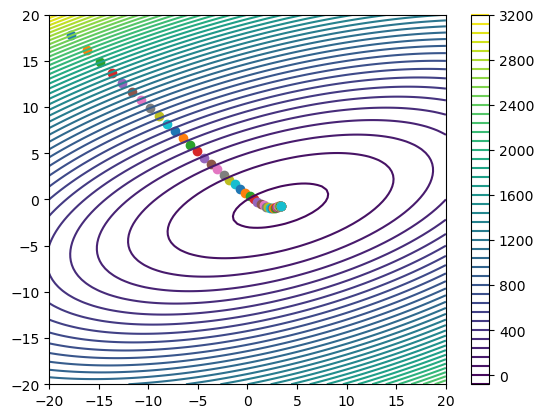

In [2]:
#2D gradient
def loss(w):
    return -8*w[0]+w[0]*w[0]+12*w[1]+4*w[1]*w[1]-2*w[0]*w[1]

def d_loss(w):
    return np.array([-8+2*w[0]-2*w[1],12+8*w[1]-2*w[0]])

#plot loss function as a function of w
x, y = np.meshgrid(np.linspace(-20,20,100), np.linspace(-20,20,100))
z=loss([x,y])
print(x.shape,y.shape,z.shape)
plt.contour(x,y,z,50)
plt.colorbar()

#gradient method
w=np.array([-20,20])
eta = 1
error = 1e-5
step =0
G =0
gamma = 0.8
epslon =1e-7
while True:
    g = d_loss(w)
    G = gamma *G + (1 -gamma) *g*g
    alpha = 1/np.sqrt(epslon+G)
    w_new = w - eta*g*alpha
    plt.scatter(w_new[0],w_new[1])
    step +=1
    if abs(w_new - w).sum() < error:
        break
    w = w_new
    
print(w_new)
print(step)

Minimum occurs at: x =  7.068896135822667  and y=  3.5822735892345614
Total steps the algorthm take: 73


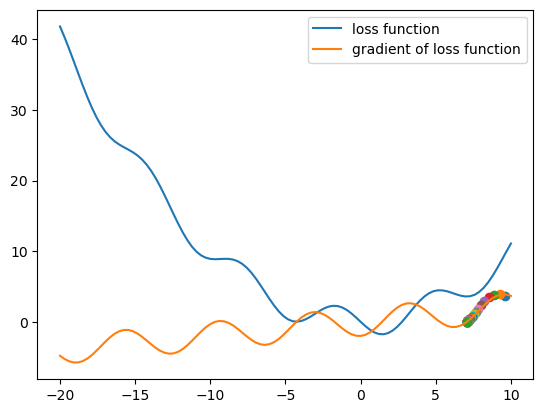

In [3]:
#problem 1 -> Use GD method to minimize
import numpy as np

def loss(w):
    return (w**2/10)-2*np.sin(w)  #function

def d_loss(w):
    return w/5 - 2 * np.cos(w)    #derivative of function

import matplotlib.pyplot as plt
x = np.linspace(-20, 10, 100)
y = loss(x)
plt.plot(x, y,label='loss function')
plt.plot(x, d_loss(x), label='gradient of loss function')
plt.legend()

#gradient descent method to minimize
w_old = 10
eta = 0.1
error = 1e-6
step =0
while True:  #gradient descent algorithm starts here
    w_new = w_old - eta*d_loss(w_old)
    plt.scatter(w_new, d_loss(w_old))
    step +=1
    if abs(w_new-w_old)<error:
        break
    w_old = w_new
print("Minimum occurs at: x = ", w_new, " and y= ", loss(w_new))
print("Total steps the algorthm take:" , step)

the minimum value at x= [0.9664984  0.65546891] and at y = -4.343994207027162
64


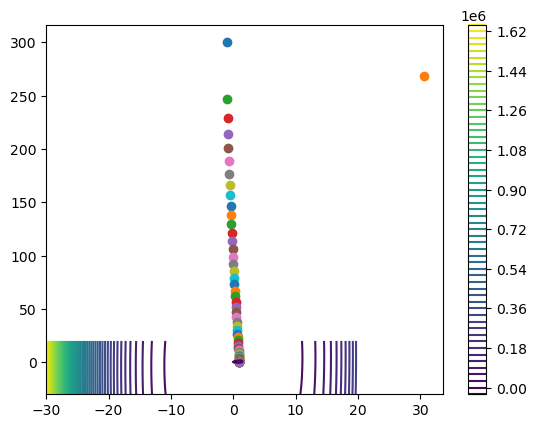

In [9]:
#using adadelta to minimize

def f(x):
    return -4*x[0]-2*x[1]-x[0]*x[0]+2*x[0]**4-2*x[0]*x[1]+3*x[1]**2

def d_f(x):
    return np.array([-4 -2*x[0]+8*x[0]**3-2*x[1],-2-2*x[0]+6*x[1]])

x,y = np.meshgrid(np.linspace(-30,20,100), np.linspace(-30,20,100))
z = f([x,y])
plt.contour(x,y,z,60)
plt.colorbar()

x_old = np.array([-1,300])

plt.scatter(x_old[0],x_old[1])

eta = 10 #learning rate
error = 1e-4
step =0
G = 0
gamma = 0.9
epsilon = 1e-8
while True and step< 1e3:
    g = d_f(x_old)
    G = gamma * G + (1 - gamma)* g**2
    x_new = x_old - eta/np.sqrt(epsilon+G)*g
    step +=1
    plt.scatter(x_new[0],x_new[1])
    if abs(x_new-x_old).sum()<error:
        break
    x_old = x_new
   

print("the minimum value at x= {} and at y = {}".format(x_new, f(x_new)))
print(step)
